In [1]:
import subprocess
import os
import json
from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style()

path_base = 'D:/Workspace/BSU-Parallel-Computing/Lab3'

In [2]:
def call(n, threads, save=True):
    path = os.path.join(path_base, 'Release/Lab3.exe')
    with open(os.path.join(path_base, 'Release/Lab3.pg'), 'w') as f:
        f.write(f'local {threads-1}')
    s = 1 if save else 0
    return subprocess.call([path, str(n), str(s)])

def test(n_range, t_range, verbose=False):
    vals = np.zeros((len(n_range),len(t_range)))
    for j, t in enumerate(t_range):
        for i, n in enumerate(n_range):
            if verbose: 
                print(f"n = {n}; threads = {t}")
            to_validate = n<1000
            while call(n, t, save=to_validate):
                pass
            with open('time.json') as json_file:
                data = json.load(json_file)
            vals[i,j] = data['total']
            if to_validate and not validate():
                print('Error!')
                return
    return vals

def validate():
    fpath = os.path.join(path_base,'A.txt')
    A = np.loadtxt(fpath, dtype=int, skiprows=1)
    fpath = os.path.join(path_base,'x.txt')
    x = np.loadtxt(fpath, dtype=float, skiprows=1)
    return np.all((np.linalg.solve(A[:,:-1], A[:,-1]) - x) < 1e-6)

In [3]:
n_range = [500, 1000, 1500, 2000]
t_range = [1, 2, 3, 4]

n = 500; threads = 1
n = 1000; threads = 1
n = 1500; threads = 1
n = 2000; threads = 1
n = 500; threads = 2
n = 1000; threads = 2
n = 1500; threads = 2
n = 2000; threads = 2
n = 500; threads = 3
n = 1000; threads = 3
n = 1500; threads = 3
n = 2000; threads = 3
n = 500; threads = 4
n = 1000; threads = 4
n = 1500; threads = 4
n = 2000; threads = 4


,1,2,3,4
500,236.0,189.0,177.0,191.0
1000,4908.0,2786.0,1872.0,1491.0
1500,19305.0,13133.0,11256.0,8324.0
2000,53997.0,30208.0,27708.0,21956.0


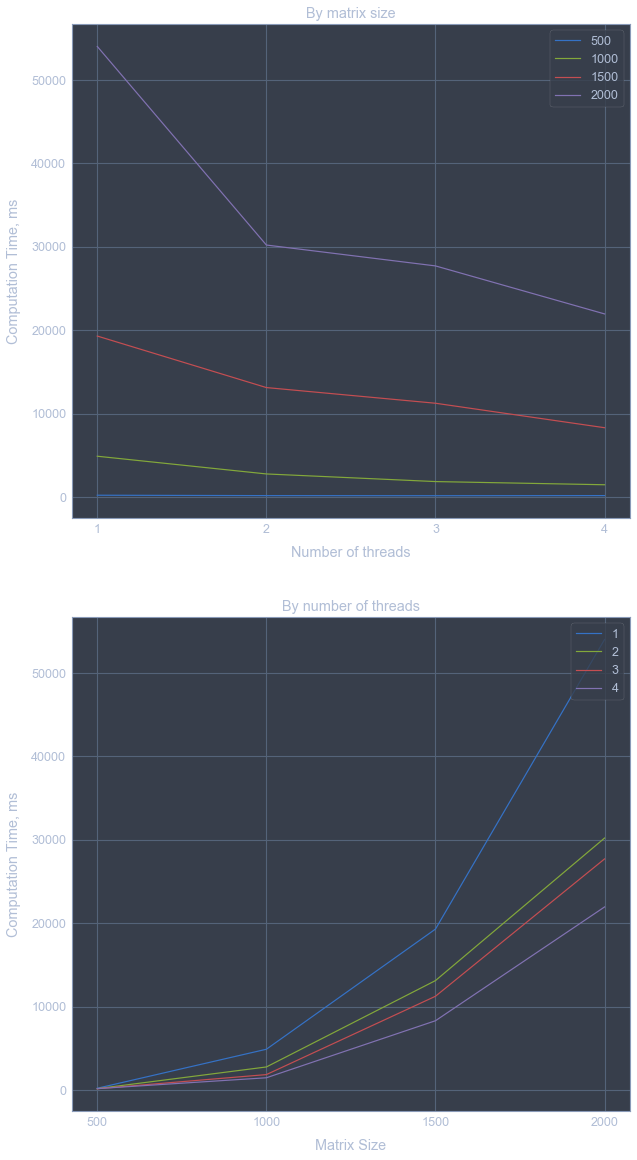

In [4]:
vals = test(n_range, t_range, verbose=True)
display(pd.DataFrame(data=vals, index=n_range, columns=t_range))

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,20))

# By matrix size
for i, n in enumerate(n_range):
    ax1.plot(t_range, vals[i])
ax1.legend(n_range, loc='upper right')
ax1.set_title('By matrix size')
ax1.set_xlabel('Number of threads',labelpad=10)
ax1.set_xticks(t_range)
ax1.set_ylabel('Computation Time, ms',labelpad=10)

# By number of threads
for j, t in enumerate(t_range):
    ax2.plot(n_range, vals[:,j].flatten())
ax2.legend(t_range, loc='upper right')
ax2.set_title('By number of threads')
ax2.set_xlabel('Matrix Size',labelpad=10)
ax2.set_xticks(n_range)
ax2.set_ylabel('Computation Time, ms',labelpad=10)

plt.show()